# BANK MARKETING: 

BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.


Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.


Dataset Attributes

Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign


Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)

After reading the problem statement we can say that it is a Binary Classification-supervised machine learning


# 1] EXPLORING DATASET- Training dataset-df,Test data-test_df


In [559]:
#Importing necessary libraries for analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [560]:
#Downloading the raw data and loading into dataframe with the help of pandas library:- Training data
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")

In [561]:
#Downloading the raw data and loading into dataframe with the help of pandas library:- Test data
test_df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")

In [562]:
#For viewing the first 5 columns in given  training dataset
df.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [563]:
# For viewing the first 5 columns in the test dataset:
test_df.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


Subscribed- Dependent Feature present in the training dataset not in test dataset.

We will analyse the training data and following the same for the test data.

In [564]:
#To know about the no of rows and columns in the dataset
df.shape

(31647, 18)

There are 31647 rows and 18 columns in the given dataset.

In [565]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


From we can get clear information about the column datatypes.
There are 10 Categorical columns in the dataset:

1)Subscribed- output/depedent feature
2)poutcome
3)month
4)contact
5)loan
6)housing
7)default
8)eduation
9)job
10)marital

There are 8 Numerical columns:

1)ID
2)Age
3)Balance
4)day
5)duration
6)campaign
7)pdays
8)previous


To analyse how many unique values in the categorical columns in the dataset.

In [566]:
print(df["job"].unique())
len(df["job"].unique())

['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']


12

There are 12 unique categories in the job column.

In [567]:
df["poutcome"].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

There are 4 categories in the poutcome column.

In [568]:
print(df["month"].unique())
len(df["month"].unique())

['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']


12

There are 12 months mention in the month column.

In [569]:
df["education"].unique() 

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

There are 4 categories in the education column.

In [570]:
df["contact"].unique() 

array(['telephone', 'cellular', 'unknown'], dtype=object)

There are 3 categories in the contact column.

In [571]:
df["marital"].unique() 

array(['married', 'divorced', 'single'], dtype=object)

There are 3 categories in the marital column.

In [572]:
df["subscribed"].unique()

array(['no', 'yes'], dtype=object)

In [573]:
df["housing"].unique()

array(['no', 'yes'], dtype=object)

In [574]:
df["default"].unique() 

array(['no', 'yes'], dtype=object)

In [575]:
df["loan"].unique() 

array(['no', 'yes'], dtype=object)

In the columns housing,subscribed,default,loan - two categories present in it.

From this exploration we can have basic information about the dataset and the datatypes in the columns.

# 2] ANALYSING  AND VISUALISATION OF THE DATASET

1)Identifying the missing values:

In [576]:
#To know about the missing values in the given dataset
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the dataset.

In [577]:
test_df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In the both of the traning and test data there is no missing values in the dataset.we will futher proceed with statistical analysis for the dataset.

2]Deleting the ID column: since the id number is not much influenced in the subscribed part.

In [578]:
df.drop(columns="ID",axis=1,inplace=True)
test_df.drop(columns="ID",axis=1,inplace=True)

3]Analysing the dataset:

In [579]:
#to know more about the statistical description of the dataset
#For only numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


OBSERVTIONS:

1)The count of all the columns are equal there is no missing values in the dataset.

2)The mean value of these columns [age,balance,day,duration,previous]are lower that the median value.So to conclude these columns can have data distribution in the left skewed.

3)The mean value of these columns[pdays] are higher than median value so to conclude these columns can have data distribution in the right skewed distribution.

4)The 75% and max difference in these columns are huge in balance,duration,pdays,previous There is outlier in these columns.

5)The pdays and previous columns has the same values in the minimum,25th,50th,75 th percentile represents there is not much values in these columns.

In [580]:
#Seperating the numerical column:
num_column=df[["age","balance","day","duration","campaign","pdays","previous"]]

In [581]:
#Seperating the Categorical column:
cat_column=df[["job","marital","education","default","housing","loan","contact","poutcome","subscribed"]]

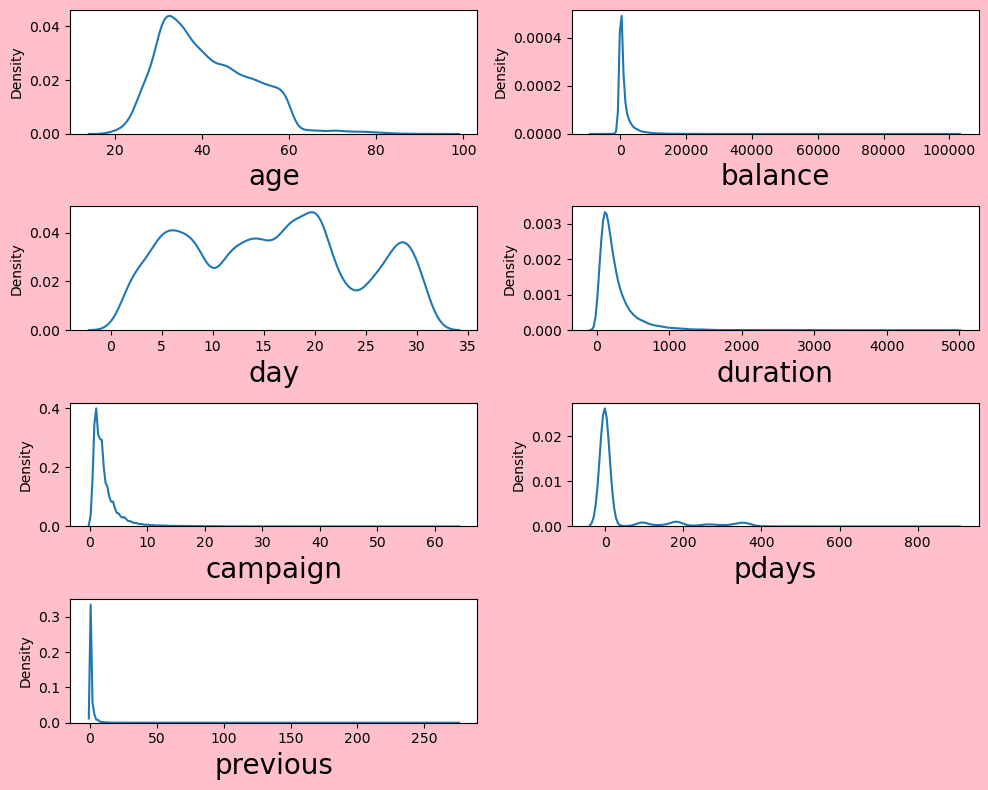

In [582]:
#To see the distribution among the numerical columns: kde plot 
plt.figure(figsize=(10,8),facecolor="pink")
plotnumber=1
for column in num_column:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.kdeplot(num_column[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From this visualisation we can surely say than all the columns have unsymmentric distribution of the data.

In [583]:
#Seperating the numerical column:
num_column2=test_df[["age","balance","day","duration","campaign","pdays"]]

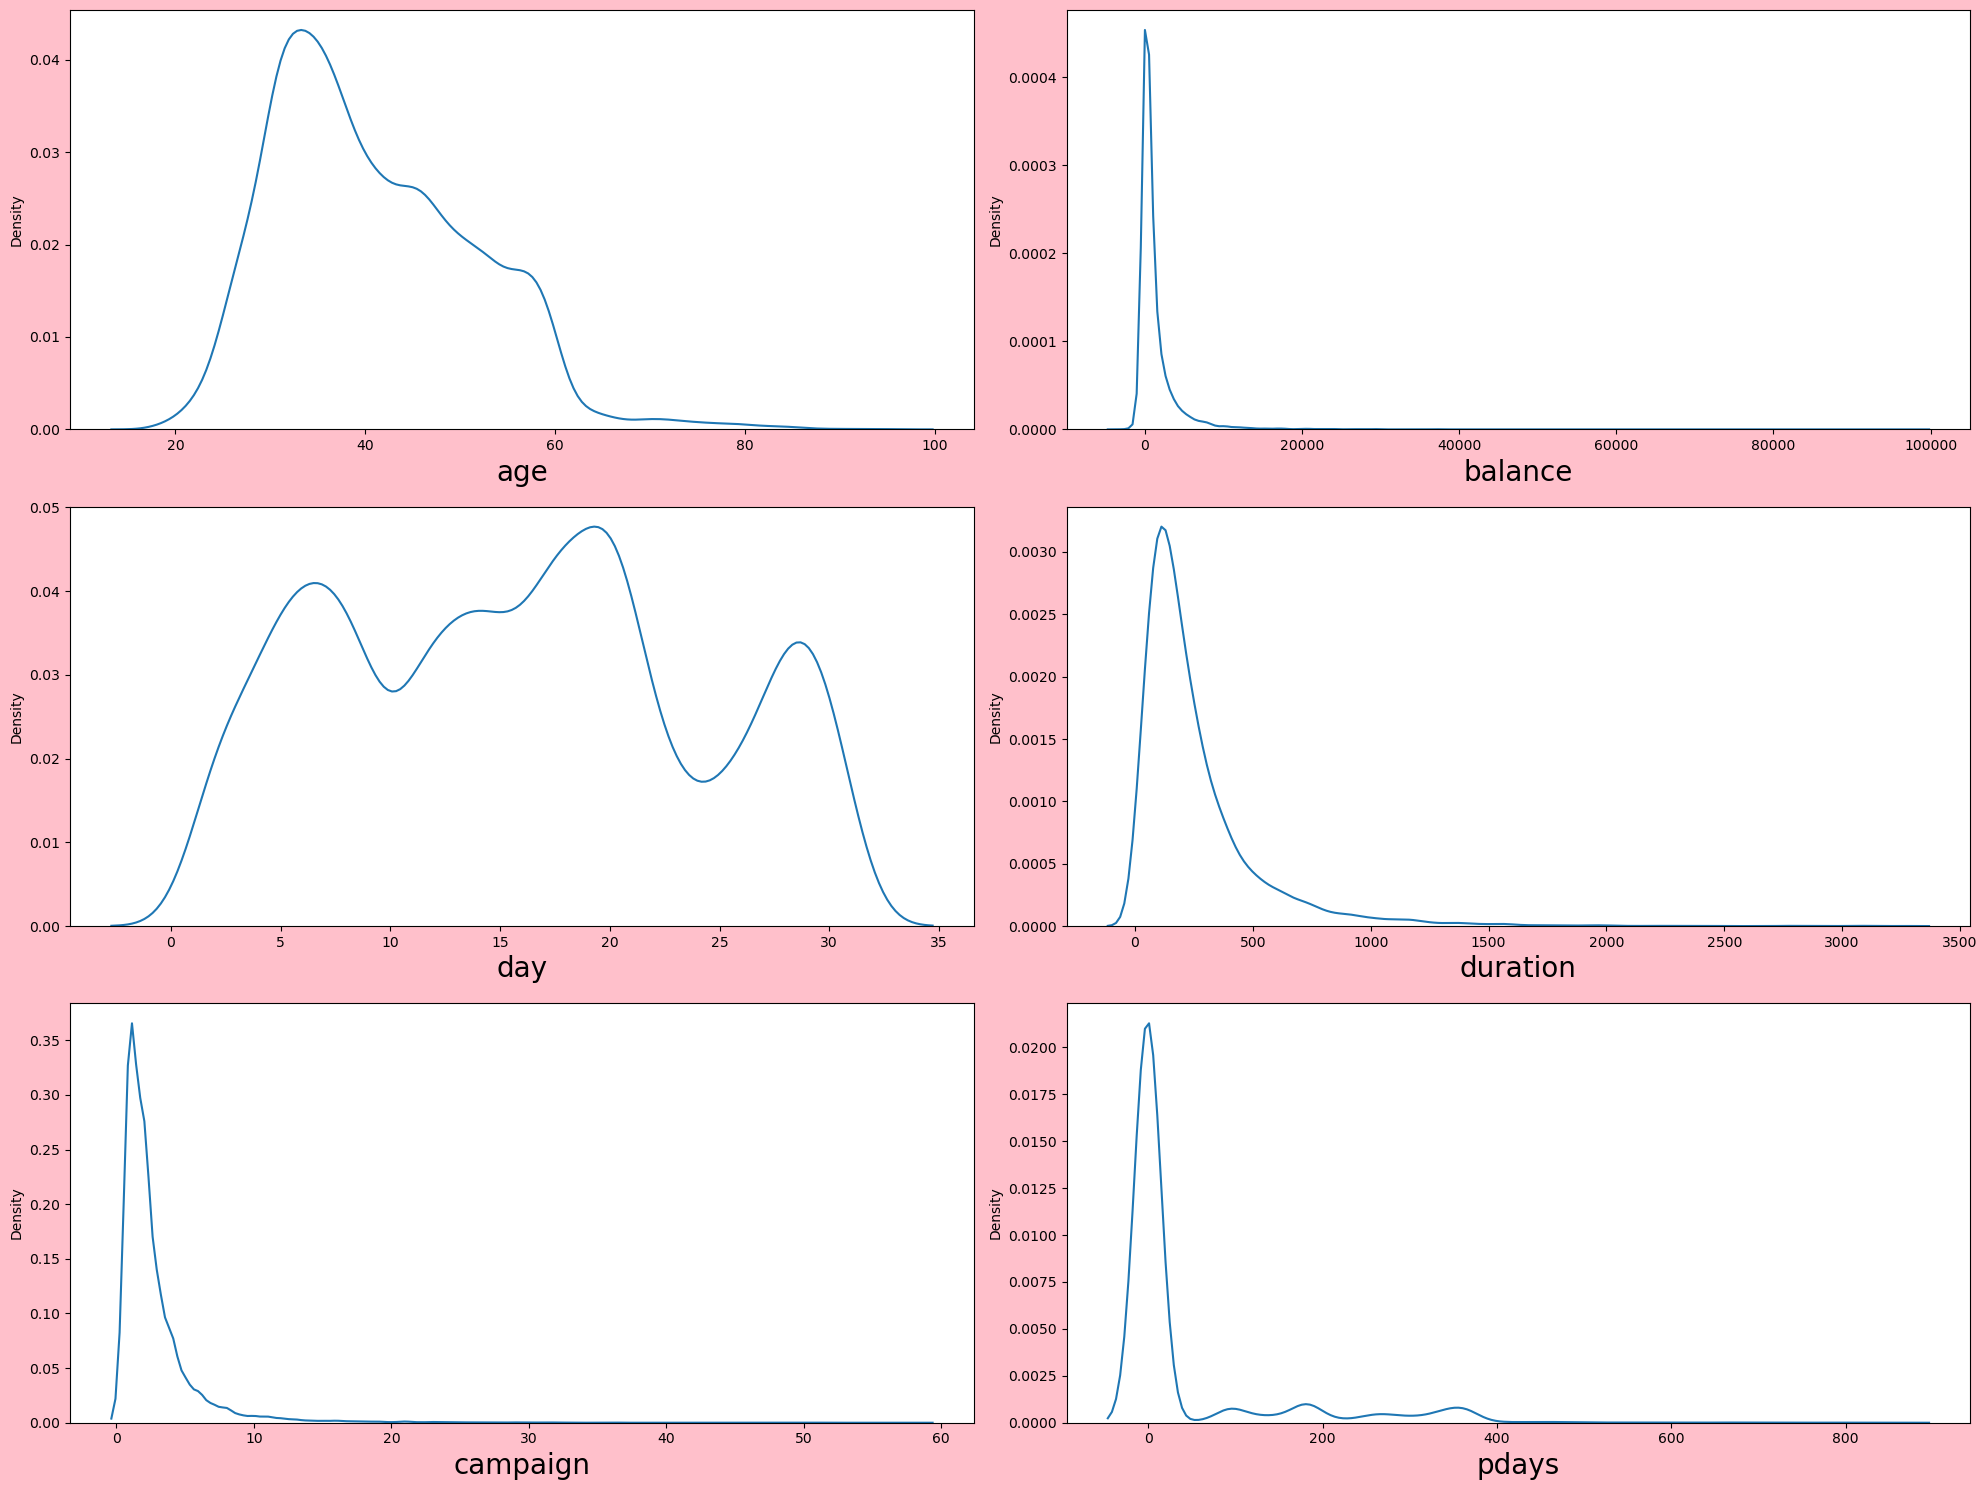

In [584]:
#To see the distribution among the numerical columns: kde plot 
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in num_column2:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.kdeplot(num_column2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In the test data also all the columns have unsymmentric distribution in all the columns.

In [585]:
df.skew()

age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

In [586]:
#removing the skewness using the cuberoot method:
df["age"]=np.cbrt(df["age"])
df["balance"]=np.cbrt(df["balance"])
df["duration"]=np.cbrt(df["duration"])
df["campaign"]=np.cbrt(df["campaign"])
df["pdays"]=np.cbrt(df["pdays"])

In [587]:
df["campaign"]=np.cbrt(df["campaign"])
df["pdays"]=np.cbrt(df["pdays"])

In [588]:
df.skew()

age          0.286363
balance     -0.086014
day          0.087185
duration     0.647275
campaign     1.106599
pdays        1.669181
previous    49.302348
dtype: float64

In [589]:
#Though the previous column has numerical values there is only 38 unique values in
#the column so considering as the categorical column.
len(df["previous"].unique())

38

In [590]:
test_df.skew()

age         0.692404
balance     9.165015
day         0.106806
duration    3.017221
campaign    4.958236
pdays       2.555601
previous    8.704583
dtype: float64

In [591]:
#removing the skewness using the cuberoot method: For test data
test_df["age"]=np.cbrt(test_df["age"])
test_df["balance"]=np.cbrt(test_df["balance"])
test_df["duration"]=np.cbrt(test_df["duration"])

In [592]:
test_df["campaign"]=np.cbrt(test_df["campaign"])
test_df["pdays"]=np.cbrt(test_df["pdays"])

In [593]:
test_df.skew()

age         0.286833
balance    -0.059591
day         0.106806
duration    0.624285
campaign    1.618080
pdays       1.722786
previous    8.704583
dtype: float64

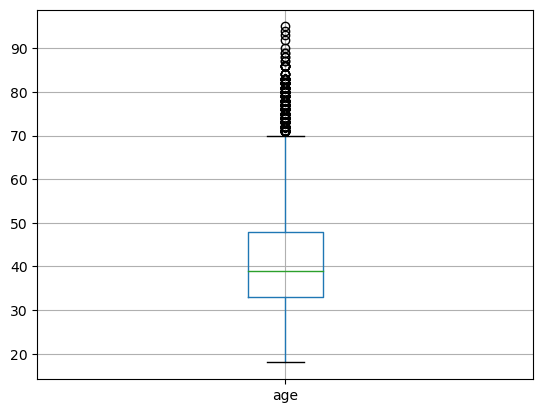

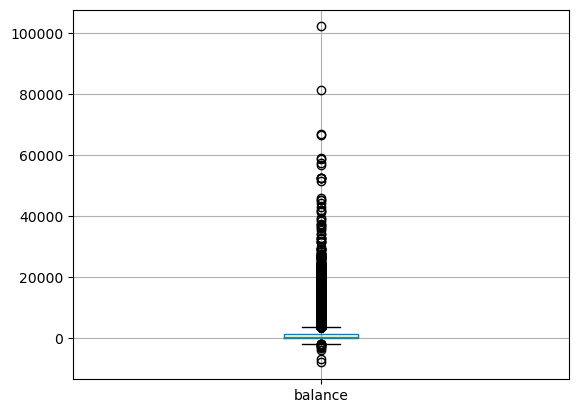

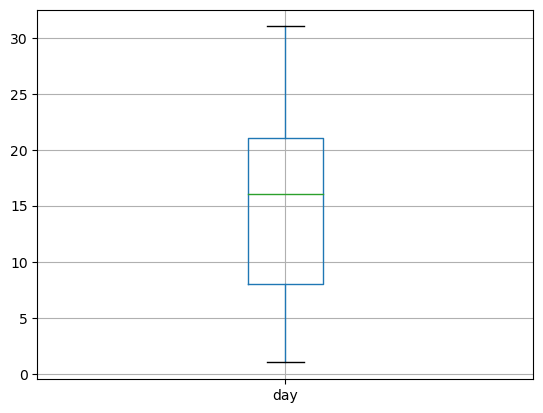

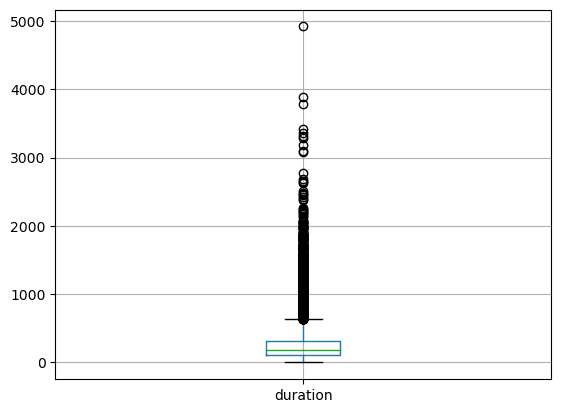

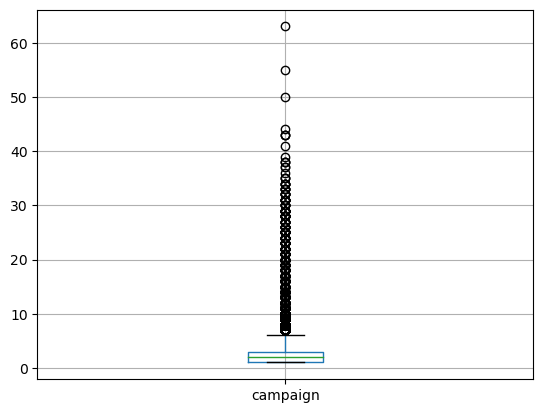

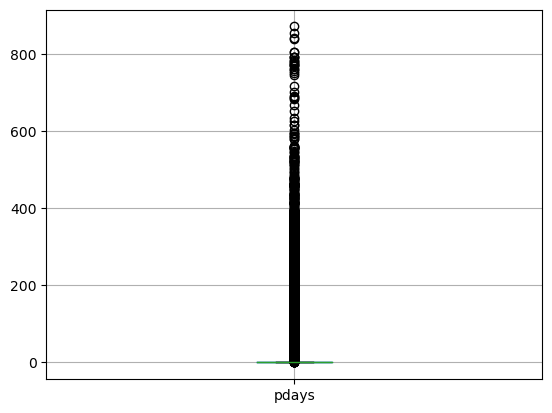

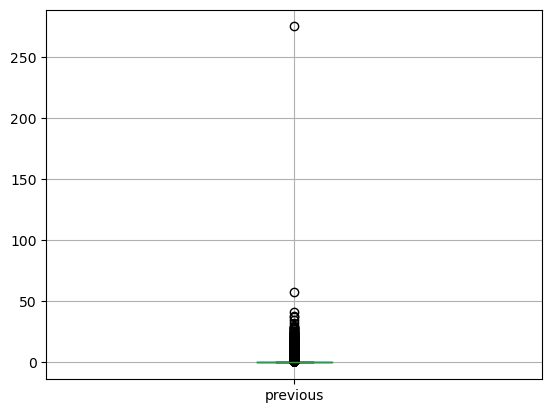

In [594]:
#To find the outliers with the help of boxplot:
for column in num_column:
    plt.figure()
    num_column.boxplot([column])

<Axes: xlabel='balance', ylabel='Count'>

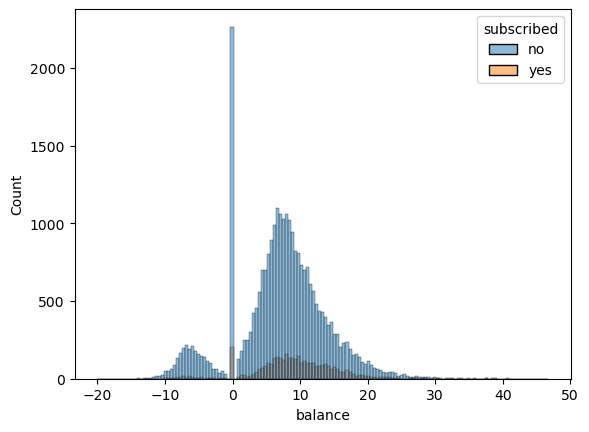

In [595]:
sns.histplot(hue="subscribed",x="balance",data=df)

zero balance people have mostly no subscribed.

<Axes: xlabel='default', ylabel='Count'>

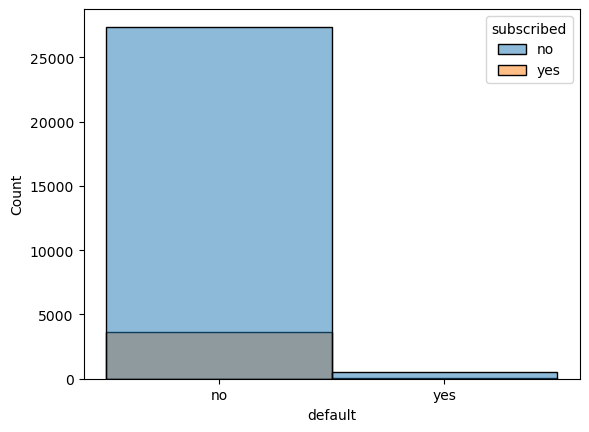

In [596]:
sns.histplot(hue="subscribed",x="default",data=df)

Compared to subscribed,unsubscribed are higher in each column.

# 4) i] Encoding -Training dataset

In [597]:
#importing the necessary libraries:
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

For simple categories like yes or no we are using basic replace technique to encode the categorical value.For the month column making it as in basic order and then transforming the column.By using target encoder Each category is encoded based on a shrunk estimate of the average target values for observations belonging to the category.

In [598]:
#Encoding subscribed column:
df.replace({"subscribed":{"no":0,"yes":1}},inplace=True)

In [599]:
#Encoding default column:
df.replace({"default":{"no":0,"yes":1}},inplace=True)

In [600]:
#Encoding housing column:
df.replace({"housing":{"no":0,"yes":1}},inplace=True)

In [601]:
#Encoding loan column:
df.replace({"loan":{"no":0,"yes":1}},inplace=True)

In [602]:
#by using target encoder encoding marital column:
encoder=TargetEncoder()
df["marital"]=encoder.fit_transform(df[["marital"]],df["subscribed"])

In [603]:
#Encoding the contact column:
df["contact"]=encoder.fit_transform(df[["contact"]],df["subscribed"])

In [604]:
#Encoding the poutcome column:
df["poutcome"]=encoder.fit_transform(df[["poutcome"]],df["subscribed"])

In [605]:
#Encoding the job column:
df["job"]=encoder.fit_transform(df[["job"]],df["subscribed"])

In [606]:
#Making the month in order and storing it in dictionary:Encoding the month column
dict_month={"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
df["month"]=df["month"].map(dict_month)

In [607]:
#Endoing the education column with ordinal Encoder:
ord_encoder1=OrdinalEncoder(categories=[["unknown","primary","secondary","tertiary"]])
encoded_values=ord_encoder1.fit_transform(df[["education"]])
df["education"]=encoded_values

<Axes: xlabel='subscribed', ylabel='count'>

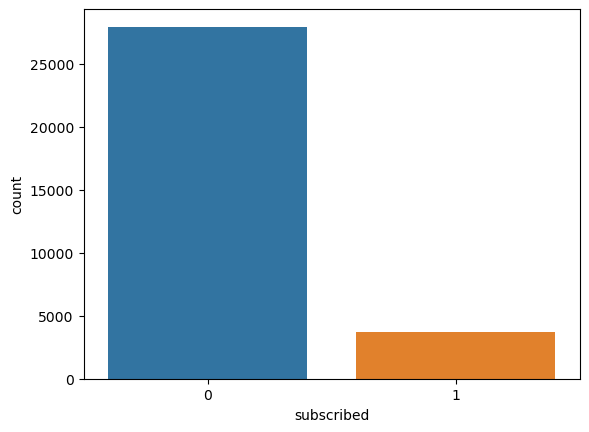

In [608]:
#Univate and Bivariate Analysis:
sns.countplot(data=df,x="subscribed")#0-no 1 -yes

<Axes: xlabel='job', ylabel='Count'>

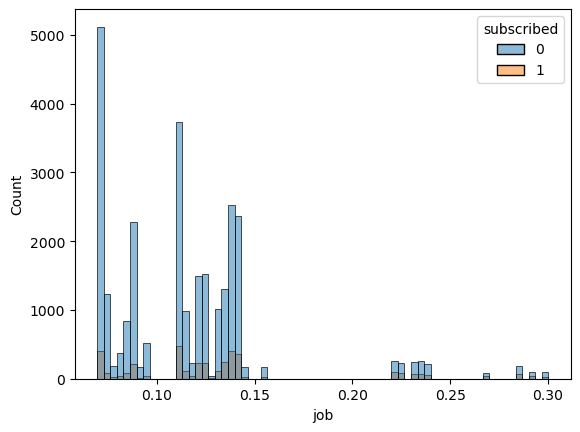

In [609]:
sns.histplot(x="job",hue="subscribed",data=df)

unsubscribed person are higher when considered the job columns.

# 4] ii ] Encoding-Testing data

In [610]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,3.174802,services,married,secondary,no,4.904868,yes,no,cellular,15,may,2.714418,1.817121,-1.000000,0,unknown
1,4.272659,retired,divorced,primary,no,14.072751,no,no,telephone,1,jul,7.191966,1.000000,-1.000000,0,unknown
2,3.141381,self-employed,single,tertiary,no,5.241483,yes,no,unknown,16,may,8.776383,1.000000,-1.000000,0,unknown
3,3.848501,services,single,primary,no,15.573360,yes,no,telephone,13,may,4.020726,1.259921,-1.000000,0,unknown
4,3.556893,blue-collar,divorced,secondary,no,-8.900130,no,yes,unknown,3,jul,4.805896,1.000000,-1.000000,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,3.391211,management,married,tertiary,no,3.556893,no,no,cellular,28,aug,5.289572,1.587401,-1.000000,0,unknown
13560,3.779763,blue-collar,married,primary,no,13.163613,yes,no,unknown,20,jun,5.406120,1.000000,-1.000000,0,unknown
13561,3.271066,retired,married,primary,no,6.580844,yes,no,cellular,29,jan,5.142563,1.000000,-1.000000,0,unknown
13562,3.072317,admin.,single,secondary,no,7.741753,no,no,cellular,9,nov,5.924992,1.259921,4.497941,3,success


In [611]:
#Encoding subscribed column:
test_df.replace({"subscribed":{"no":0,"yes":1}},inplace=True)

In [612]:
#Encoding default column:
test_df.replace({"default":{"no":0,"yes":1}},inplace=True)

In [613]:
#Encoding housing column:
test_df.replace({"housing":{"no":0,"yes":1}},inplace=True)

In [614]:
#Encoding loan column:
test_df.replace({"loan":{"no":0,"yes":1}},inplace=True)

In [615]:
#Making the month in order and storing it in dictionary:Encoding the month column
dict_month={"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
test_df["month"]=test_df["month"].map(dict_month)

In [616]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,3.174802,services,married,secondary,0,4.904868,1,0,cellular,15,5,2.714418,1.817121,-1.000000,0,unknown
1,4.272659,retired,divorced,primary,0,14.072751,0,0,telephone,1,7,7.191966,1.000000,-1.000000,0,unknown
2,3.141381,self-employed,single,tertiary,0,5.241483,1,0,unknown,16,5,8.776383,1.000000,-1.000000,0,unknown
3,3.848501,services,single,primary,0,15.573360,1,0,telephone,13,5,4.020726,1.259921,-1.000000,0,unknown
4,3.556893,blue-collar,divorced,secondary,0,-8.900130,0,1,unknown,3,7,4.805896,1.000000,-1.000000,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,3.391211,management,married,tertiary,0,3.556893,0,0,cellular,28,8,5.289572,1.587401,-1.000000,0,unknown
13560,3.779763,blue-collar,married,primary,0,13.163613,1,0,unknown,20,6,5.406120,1.000000,-1.000000,0,unknown
13561,3.271066,retired,married,primary,0,6.580844,1,0,cellular,29,1,5.142563,1.000000,-1.000000,0,unknown
13562,3.072317,admin.,single,secondary,0,7.741753,0,0,cellular,9,11,5.924992,1.259921,4.497941,3,success


# 5)Splitting The Dataset Into Feature and Target:

In [617]:
#Importing the neccessary libraries and model for further creation of the model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [618]:
X=df.drop("subscribed",axis=1)
Y=df[["subscribed"]]

In [619]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [620]:
#To split the data into train and test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=2)

# 6)Creating model 1:Logistic Regression

In [621]:
#Model Instantiating and training:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [622]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=log_reg.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [623]:
#for training -Accuracy score
y_trpred=log_reg.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [624]:
print("Training Score for logistic Regression Model is :",round(train_Accuracy*100,2))
print("Testing  Score for logistic Regression Model is :",round(test_Accuracy*100,2))

Training Score for logistic Regression Model is : 89.95
Testing  Score for logistic Regression Model is : 89.72


In [625]:
#Calculation of confusion matrix
confusion_matrix1 = confusion_matrix(y_test,y_tepred)
confusion_matrix1

array([[5454,  160],
       [ 491,  225]], dtype=int64)

In [626]:
((5455+229)/(5455+159+491+225))*100 # the model accuracy

89.79462875197473

# 6)Creating model 2:RandomForestClassifier

In [627]:
#Model Instantiating and training:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [628]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=RFC.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [629]:
#for training -Accuracy score
y_trpred=RFC.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [630]:
#Displaying the accuracy percentage:
print("Training Score for Random Forest Classifer Model is :",round(train_Accuracy*100,2))
print("Testing  Score for Random Forest Classifier Model is :",round(test_Accuracy*100,2))

Training Score for Random Forest Classifer Model is : 100.0
Testing  Score for Random Forest Classifier Model is : 90.66


In [631]:
confusion_matrix2=confusion_matrix(y_test,y_tepred)
confusion_matrix2

array([[5456,  158],
       [ 433,  283]], dtype=int64)

In [632]:
(5459+273)/(5459+155+443+273)

0.9055292259083728

# 6)Creating model 3:Support Vector Machine

In [633]:
from sklearn.svm import SVC

In [634]:
#Model Instantiating and training:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

In [635]:
svm.fit(x_train,y_train)

SVC(gamma=0.5)

In [636]:
#how model performs on unseen[test data] and getting accuracy score
y_tepred=svm.predict(x_test)
test_Accuracy=accuracy_score(y_test,y_tepred)

In [637]:
#for training -Accuracy score
y_trpred=svm.predict(x_train)
train_Accuracy=accuracy_score(y_train,y_trpred)

In [638]:
#Displaying the accuracy percentage:
print("Training Score for Support Vector Machine Model is :",round(train_Accuracy*100,2))
print("Testing  Score for Support Vector Machine Model Model is :",round(test_Accuracy*100,2))

Training Score for Support Vector Machine Model is : 95.96
Testing  Score for Support Vector Machine Model Model is : 89.23


In [639]:
confusion_matrix3=confusion_matrix(y_test,y_tepred)
confusion_matrix3

array([[5524,   90],
       [ 592,  124]], dtype=int64)

In [640]:
(5525+122)/(5525+89+594+122)

0.8921011058451817

# 6)Hyper parameter Turing:

In [641]:
from sklearn.model_selection import GridSearchCV

In [642]:
grid = {"C": np.logspace(-3, 3, 20), "penalty": ["l2"]}# range of values randomly given 
logreg = LogisticRegression()
grid_logreg = GridSearchCV(logreg, grid, cv=10)
grid_logreg.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2']})

In [643]:
best_params = grid_logreg.best_params_
best_accuracy = grid_logreg.best_score_ * 100
print("Tuned hyperparameters (best parameters):", best_params)
print("Accuracy:", best_accuracy)

Tuned hyperparameters (best parameters): {'C': 0.008858667904100823, 'penalty': 'l2'}
Accuracy: 89.97513143497721


# 7)Build a predictive model:

In [644]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,3.174802,services,married,secondary,0,4.904868,1,0,cellular,15,5,2.714418,1.817121,-1.000000,0,unknown
1,4.272659,retired,divorced,primary,0,14.072751,0,0,telephone,1,7,7.191966,1.000000,-1.000000,0,unknown
2,3.141381,self-employed,single,tertiary,0,5.241483,1,0,unknown,16,5,8.776383,1.000000,-1.000000,0,unknown
3,3.848501,services,single,primary,0,15.573360,1,0,telephone,13,5,4.020726,1.259921,-1.000000,0,unknown
4,3.556893,blue-collar,divorced,secondary,0,-8.900130,0,1,unknown,3,7,4.805896,1.000000,-1.000000,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,3.391211,management,married,tertiary,0,3.556893,0,0,cellular,28,8,5.289572,1.587401,-1.000000,0,unknown
13560,3.779763,blue-collar,married,primary,0,13.163613,1,0,unknown,20,6,5.406120,1.000000,-1.000000,0,unknown
13561,3.271066,retired,married,primary,0,6.580844,1,0,cellular,29,1,5.142563,1.000000,-1.000000,0,unknown
13562,3.072317,admin.,single,secondary,0,7.741753,0,0,cellular,9,11,5.924992,1.259921,4.497941,3,success


In [645]:
#importing the necessary libraries:
from sklearn.preprocessing import LabelEncoder

In [646]:
encoder= LabelEncoder()

In [647]:
#by using target encoder encoding marital column:
test_df["job"]=encoder.fit_transform(test_df["job"])
test_df["poutcome"]=encoder.fit_transform(test_df["poutcome"])
test_df["marital"]=encoder.fit_transform(test_df["marital"])
test_df["contact"]=encoder.fit_transform(test_df["contact"])

In [648]:
#Endoing the education column with ordinal Encoder:
ord_encoder1=OrdinalEncoder(categories=[["unknown","primary","secondary","tertiary"]])
encoded_values=ord_encoder1.fit_transform(test_df[["education"]])
test_df["education"]=encoded_values

In [649]:
subscribed_pred=log_reg.predict(test_df)

In [650]:
subscribed_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [651]:
subs_df=pd.DataFrame({
    "SUBSCRIBED":subscribed_pred
})

In [653]:
subs_df.to_csv("Subscribed_pred.csv")

In [663]:
subs_df

,SUBSCRIBED
0,1
1,1
2,1
3,1
4,1
...,...
13559,1
13560,1
13561,1
13562,1


1 represents yes

0 represent no

#End of the project